In [36]:
import numpy as np
from numpy.lib.function_base import interp

In [37]:
qubit0 = np.array([[1],[0]])
qubit1 = np.array([[0], [1]])

In [38]:
qubit0

array([[1],
       [0]])

In [39]:
qudit0 = np.kron(qubit0, qubit0)
qudit1 = np.kron(qubit0, qubit1)
qudit2 = np.kron(qubit1, qubit0)

In [40]:
qubitStan0x0 = np.kron(qubit0, qubit0.conjugate().T)
qubitStan1x1 = np.kron(qubit1, qubit1.conjugate().T)

In [41]:
stan0x0 = np.kron(qudit0, qudit0.conj().T)
stan1x1 = np.kron(qudit1, qudit1.conj().T)
stan2x2 = np.kron(qudit2, qudit2.conj().T)

In [42]:
stan0x0

array([[1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [43]:
qubitStan0x0

array([[1, 0],
       [0, 0]])

In [44]:
qubitStan1x1

array([[0, 0],
       [0, 1]])

In [57]:
import itertools

def CZgate(control, track):
    final = []
    
    P = np.array([[1, 0], [0, np.exp(2*1j*np.pi/3)]])
    I = np.identity(2)
    
    print(P)
    
    temp = itertools.product([qubitStan0x0, qubitStan1x1], repeat=5)
    
    for i in temp:
        lst = [0] * 6
        indexes = list([i for i in range(6) if i != track])
        for idx, val in zip(indexes, i):
            lst[idx] = val
        if np.array_equal(lst[control], qubitStan1x1):
            lst[track] = P
        else:
            lst[track] = I
        final.append(lst)
        
    return final

In [58]:
test = CZgate(3, 4)

[[ 1. +0.j         0. +0.j       ]
 [ 0. +0.j        -0.5+0.8660254j]]


In [59]:
len(test)

32

In [60]:
test

[[array([[1, 0],
         [0, 0]]),
  array([[1, 0],
         [0, 0]]),
  array([[1, 0],
         [0, 0]]),
  array([[1, 0],
         [0, 0]]),
  array([[1., 0.],
         [0., 1.]]),
  array([[1, 0],
         [0, 0]])],
 [array([[1, 0],
         [0, 0]]),
  array([[1, 0],
         [0, 0]]),
  array([[1, 0],
         [0, 0]]),
  array([[1, 0],
         [0, 0]]),
  array([[1., 0.],
         [0., 1.]]),
  array([[0, 0],
         [0, 1]])],
 [array([[1, 0],
         [0, 0]]),
  array([[1, 0],
         [0, 0]]),
  array([[1, 0],
         [0, 0]]),
  array([[0, 0],
         [0, 1]]),
  array([[ 1. +0.j       ,  0. +0.j       ],
         [ 0. +0.j       , -0.5+0.8660254j]]),
  array([[1, 0],
         [0, 0]])],
 [array([[1, 0],
         [0, 0]]),
  array([[1, 0],
         [0, 0]]),
  array([[1, 0],
         [0, 0]]),
  array([[0, 0],
         [0, 1]]),
  array([[ 1. +0.j       ,  0. +0.j       ],
         [ 0. +0.j       , -0.5+0.8660254j]]),
  array([[0, 0],
         [0, 1]])],
 [array([[1,

In [26]:
import qiskit.circuit.library
from qiskit import QuantumCircuit
import numpy as np
from qiskit.quantum_info import Statevector

circ =QuantumCircuit(2) 
omega = 2*np.pi/3

circ.cp(omega, 0, 1)
circ.draw()

q_0: ─■────────
      │P(2π/3) 
q_1: ─■────────

In [27]:
def CZqutrit():
    circ = QuantumCircuit(4)
    omega = 2*np.pi/3
    circ.cp(omega, 0, 2)
    circ.cp(omega, 1, 3)
    circ.cp(-1 * omega, 0, 2)
    circ.cp(-1 * omega, 1, 3)
    
    return circ

In [28]:
czcirc = CZqutrit()

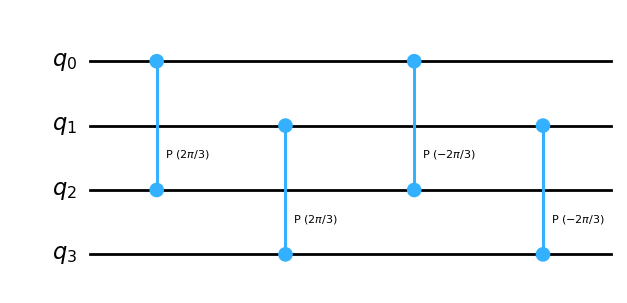

In [29]:
czcirc.draw('mpl')

In [30]:
vec = Statevector(czcirc)

In [32]:
vec.draw('latex')

<IPython.core.display.Latex object>

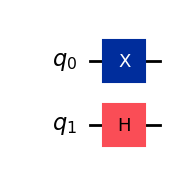

In [33]:
test = QuantumCircuit(2)
test.x(0)
test.h(1)
test.draw('mpl')

In [35]:
Statevector(czcirc).draw('latex')

<IPython.core.display.Latex object>